<a href="https://colab.research.google.com/github/vanssea/PCVK-_Ganjil-2025/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week3 - Operasi Dasar Pengolahan Citra
Template praktikum Modul 3 - PCVK
Silakan upload gambar ke folder `/content/drive/MyDrive/images/` sesuai instruksi.

In [4]:
from google.colab import drive
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import glob
from math import log10, sqrt

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
def show(img, title="Image", cmap=None):
    plt.figure(figsize=(6,6))
    if len(img.shape) == 2:
        plt.imshow(img, cmap=cmap)
    else:
        img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        plt.imshow(img_rgb)
    plt.title(title)
    plt.axis("off")
    plt.show()

def truncate(val):
    return max(0, min(255, val))


 Mengubah tingkat kecerahan citra 
-----------------------------------
Masukkan nilai kecerahan: 50


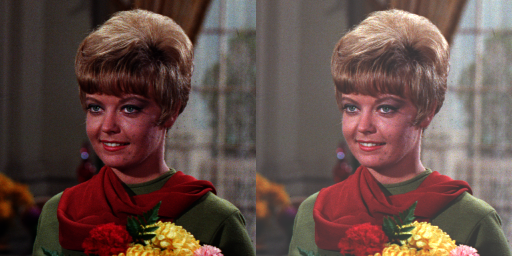

In [ ]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

print(' Mengubah tingkat kecerahan citra ')
print('-----------------------------------')
try:
    brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
    print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/images/female.tiff')
# brightness_image = np.zeros(original.shape, original.dtype)

# akses per piksel
# for y in range(original.shape[0]):
#     for x in range(original.shape[1]):
#         for c in range(original.shape[2]):
#             brightness_image[y, x, c] = np.clip(original[y, x, c] + brightness, 0, 255)

# cara simple tanpa for loop
brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat([original, brightness_image])
cv2_imshow(final_frame)

## D1.1 Inverse Citra

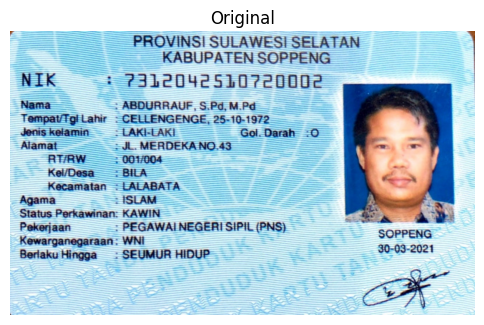

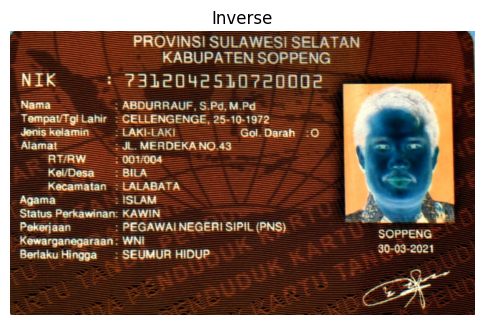

In [ ]:
img = cv.imread('/content/drive/MyDrive/images/sample.jpg')
inverse = 255 - img
show(img, "Original")
show(inverse, "Inverse")


## D1.2 Transformasi Contrast

Mengubah kontras dan tingkat kecerahan citra
--------------------------------------------
Masukkan tingkat kecerahan [-255 - 255]: 50
Masukkan kontras [1.0 - 3.0]: 2


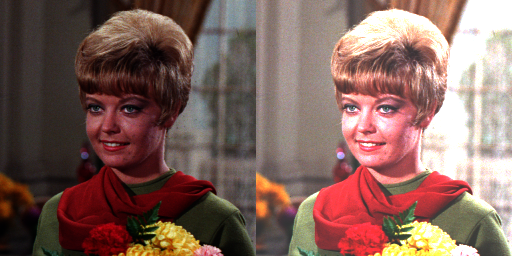

In [6]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

print("Mengubah kontras dan tingkat kecerahan citra")
print("--------------------------------------------")

try:
    brightness = int(input("Masukkan tingkat kecerahan [-255 - 255]: "))
except ValueError:
    print("Error: input kecerahan tidak valid")
    brightness = 0

try:
    contrast = float(input("Masukkan kontras [1.0 - 3.0]: "))
except ValueError:
    print("Error: input kontras tidak valid")
    contrast = 1.0

# Baca gambar
path = "/content/drive/MyDrive/images/female.tiff"
original = cv.imread(path)

if original is None:
    print("Gambar tidak ditemukan:", path)
else:
    # Terapkan brightness dan contrast
    adjusted = cv.convertScaleAbs(original, alpha=contrast, beta=brightness)

    # Gabungkan hasil (asli vs hasil modifikasi)
    final_frame = cv.hconcat([original, adjusted])

    # Tampilkan
    cv2_imshow(final_frame)


## D1.3 Transformasi Logarithmic Brightness

 Mengubah tingkat kecerahan citra dengan Transformasi Log 
-----------------------------------------------------------
Masukkan nilai kecerahan: 50


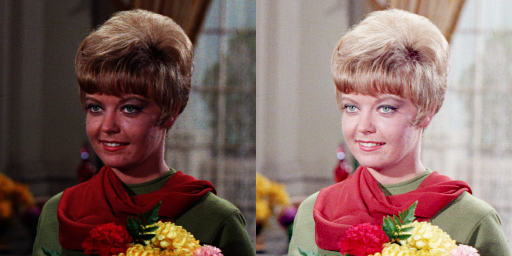

In [9]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

print(' Mengubah tingkat kecerahan citra dengan Transformasi Log ')
print('-----------------------------------------------------------')
try:
    brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
    print('Error, not a number')
    brightness = 0

# Baca gambar
original = cv.imread('/content/drive/MyDrive/images/female.tiff')

# cara manual (akses per piksel)
log_image = np.zeros(original.shape, dtype=np.uint8)
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            r = original[y, x, c]
            s = brightness * np.log(1 + r)
            log_image[y, x, c] = np.clip(s, 0, 255)

# cara simple tanpa for loop
img_float = original.astype(np.float32)
log_image = brightness * np.log(1 + img_float)
log_image = cv.normalize(log_image, None, 0, 255, cv.NORM_MINMAX)
log_image = np.uint8(log_image)

# gabungkan hasil
final_frame = cv.hconcat([original, log_image])
cv2_imshow(final_frame)


## D1.4 Grayscale (Averaging, Lightness, Luminance)

a. Averaging


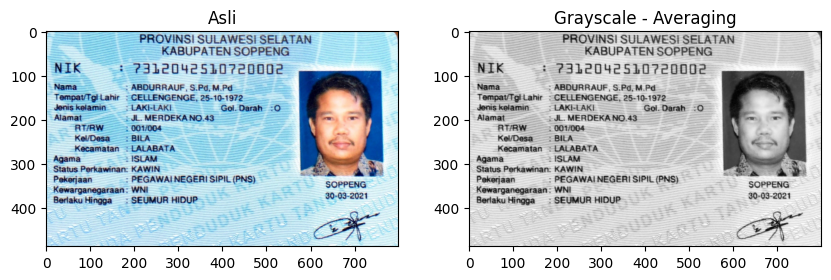

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Baca gambar
img_average = cv2.imread('/content/drive/MyDrive/images/sample.jpg')
B = img_average[:, :, 0]
G = img_average[:, :, 1]
R = img_average[:, :, 2]

# Formula Averaging
gray_avg = ((R.astype(np.float32) + G.astype(np.float32) + B.astype(np.float32)) / 3).astype(np.uint8)

# Tampilkan hasil
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img_average, cv2.COLOR_BGR2RGB))
plt.title("Asli")

plt.subplot(1,2,2)
plt.imshow(gray_avg, cmap="gray")
plt.title("Grayscale - Averaging")
plt.show()


b. Lightness

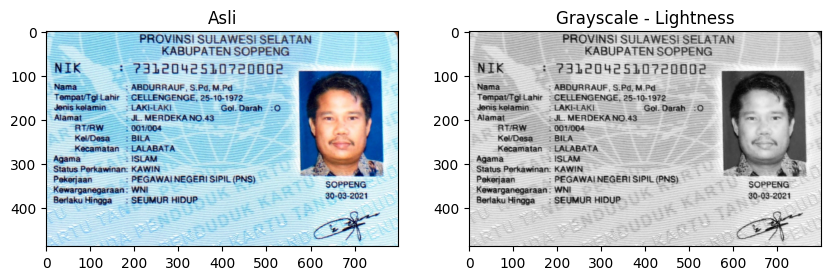

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Baca gambar
img_lightness = cv2.imread('/content/drive/MyDrive/images/sample.jpg')
B = img_lightness[:, :, 0]
G = img_lightness[:, :, 1]
R = img_lightness[:, :, 2]

# Formula Lightness
gray_light = ((np.maximum(np.maximum(R, G), B).astype(np.float32) +
               np.minimum(np.minimum(R, G), B).astype(np.float32)) / 2).astype(np.uint8)

# Tampilkan hasil
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img_lightness, cv2.COLOR_BGR2RGB))
plt.title("Asli")

plt.subplot(1,2,2)
plt.imshow(gray_light, cmap="gray")
plt.title("Grayscale - Lightness")
plt.show()

c. Luminance

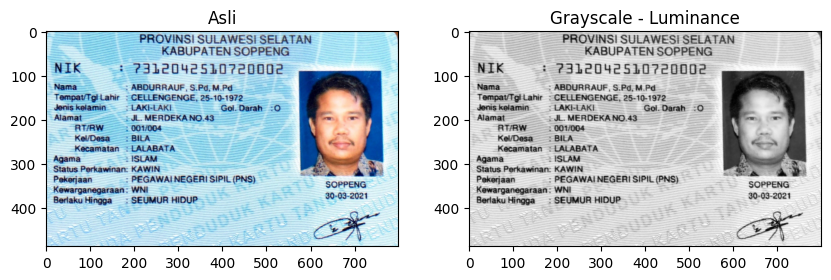

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Baca gambar
img_luminance = cv2.imread('/content/drive/MyDrive/images/sample.jpg')
B = img_luminance[:, :, 0]
G = img_luminance[:, :, 1]
R = img_luminance[:, :, 2]

# Formula Luminance
gray_lum = (0.21 * R.astype(np.float32) +
            0.72 * G.astype(np.float32) +
            0.07 * B.astype(np.float32)).astype(np.uint8)

# Tampilkan hasil
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img_luminance, cv2.COLOR_BGR2RGB))
plt.title("Asli")

plt.subplot(1,2,2)
plt.imshow(gray_lum, cmap="gray")
plt.title("Grayscale - Luminance")
plt.show()


## D1.5 Warna tertentu (Biru tetap, lain grayscale)

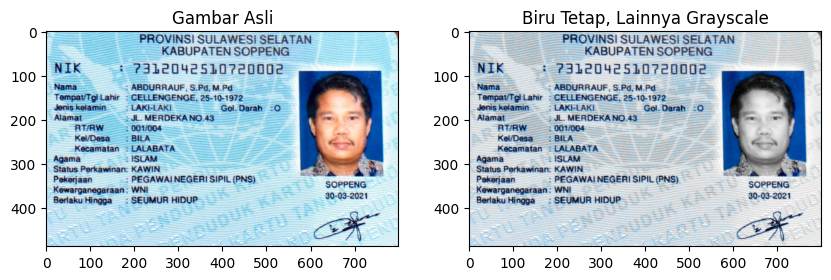

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Baca gambar
original = cv2.imread('/content/drive/MyDrive/images/sample.jpg')

# Konversi ke RGB dan HSV
original_rgb = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
hsv = cv2.cvtColor(original, cv2.COLOR_BGR2HSV)

# Range warna biru (HSV)
lower_blue = np.array([100, 50, 50])
upper_blue = np.array([140, 255, 255])

# Masking warna biru
mask = cv2.inRange(hsv, lower_blue, upper_blue)

# Konversi ke grayscale
gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
gray_rgb = cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB)

# Gabungkan hasil -> biru tetap, selain biru jadi grayscale
result = np.where(mask[:, :, None] == 0, gray_rgb, original_rgb)

# Tampilkan hasil
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(original_rgb)
plt.title("Gambar Asli")

plt.subplot(1, 2, 2)
plt.imshow(result)
plt.title("Biru Tetap, Lainnya Grayscale")

plt.show()



## D2.1 Gamma Correction

 Gamma Correction pada citra 
-------------------------------
Masukkan nilai Gamma: 3


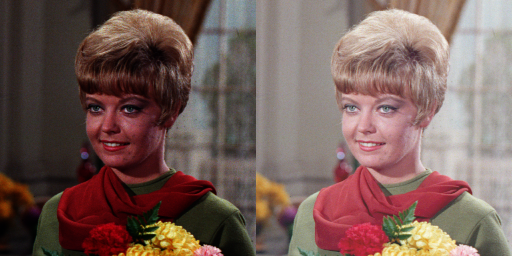

In [23]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

print(' Gamma Correction pada citra ')
print('-------------------------------')
try:
    gamma = float(input('Masukkan nilai Gamma: '))
except ValueError:
    print('Error, not a number')
    gamma = 1.0

# Baca gambar
original = cv2.imread('/content/drive/MyDrive/images/female.tiff')
gamma_image = np.zeros(original.shape, original.dtype)

# akses per piksel
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            # rumus gamma correction
            gamma_image[y, x, c] = np.clip(
                255 * ((original[y, x, c] / 255) ** (1 / gamma)),
                0, 255
            ).astype(np.uint8)

# gabungkan hasil
final_frame = cv2.hconcat((original, gamma_image))
cv2_imshow(final_frame)



## D2.2 Simulasi Image Depth

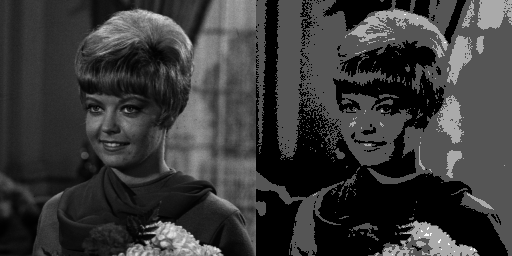

In [28]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

bit_depth = 2
level = 255 / (pow(2, bit_depth) - 1)

original = cv.imread('/content/drive/MyDrive/images/female.tiff', cv.IMREAD_GRAYSCALE)

# lanjutkan kode dari modul
depth_image = np.zeros(original.shape, original.dtype)

# akses per piksel
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        new_val = round(original[y, x] / level) * level
        depth_image[y, x] = np.clip(new_val, 0, 255)

# gabungkan hasil
final_frame = cv.hconcat([original, depth_image])
cv2_imshow(final_frame)


## D2.3 Average Denoising + PSNR

 Average Denoising dengan PSNR 
--------------------------------


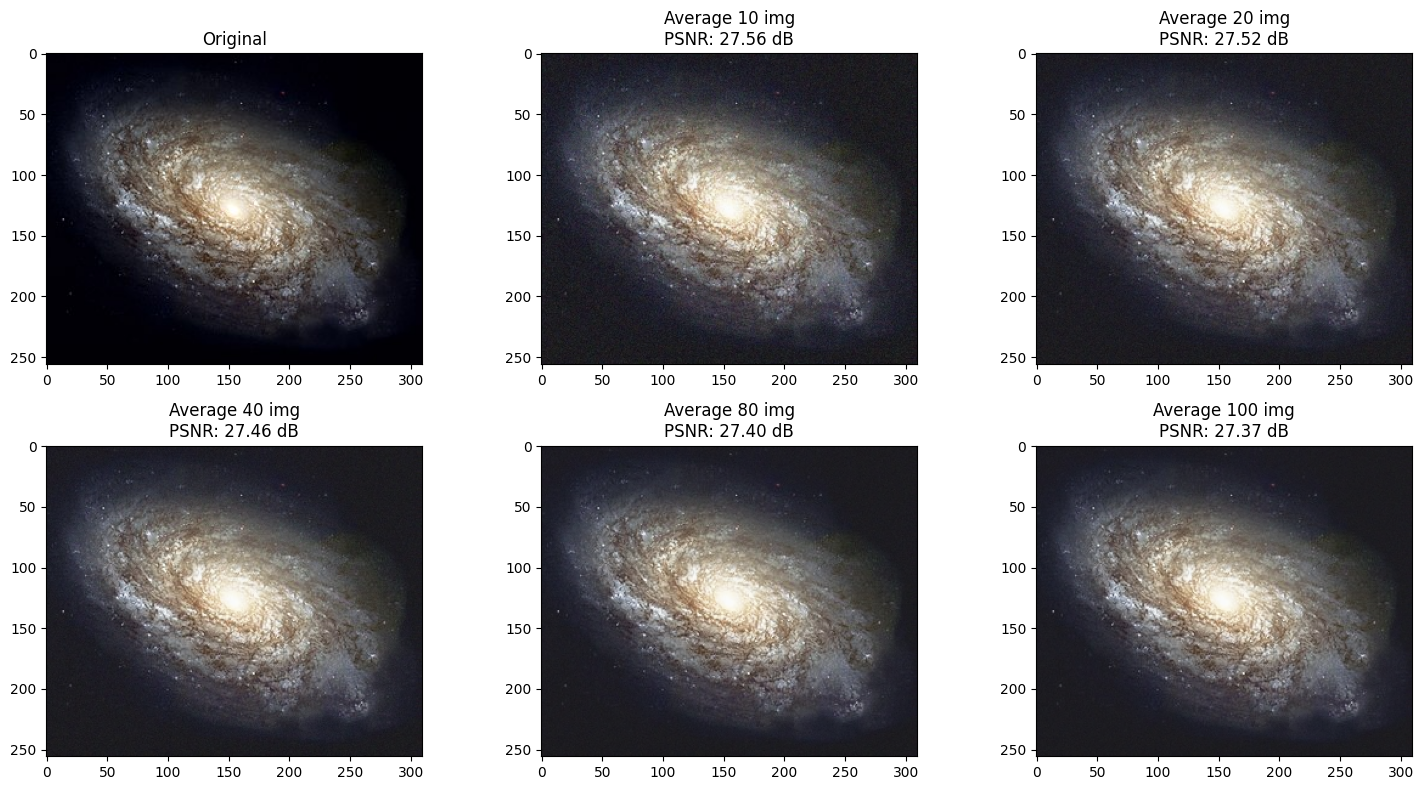

In [36]:
import cv2 as cv
import numpy as np
import glob
import matplotlib.pyplot as plt
import math

print(' Average Denoising dengan PSNR ')
print('--------------------------------')

# Fungsi PSNR
def PSNR(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return 100
    max_pixel = 255.0
    return 20 * math.log10(max_pixel / math.sqrt(mse))

# --- Baca semua image dalam satu folder sesuai instruksi modul ---
cv_img = []
for img in glob.glob('/content/drive/MyDrive/images/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

# Baca citra asli
original = cv.imread('/content/drive/MyDrive/images/galaxy.jpg')

# Tahapan jumlah citra untuk average
steps = [10, 20, 40, 80, 100]
results = []

for n in steps:
    # Ambil n citra pertama
    imgs = [im.astype(np.float32) for im in cv_img[:n]]
    avg_img = np.mean(imgs, axis=0).astype(np.uint8)
    psnr_val = PSNR(original, avg_img)
    results.append((n, avg_img, psnr_val))

# --- Tampilkan hasil ---
plt.figure(figsize=(15, 8))

# Gambar asli
plt.subplot(2, 3, 1)
plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))
plt.title("Original")
plt.axis('on')

# Hasil average dengan berbagai jumlah citra
for i, (n, img, psnr_val) in enumerate(results, start=2):
    plt.subplot(2, 3, i)
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.title(f"Average {n} img\nPSNR: {psnr_val:.2f} dB")
    plt.axis('on')

plt.tight_layout()
plt.show()



## D2.4 Image Masking

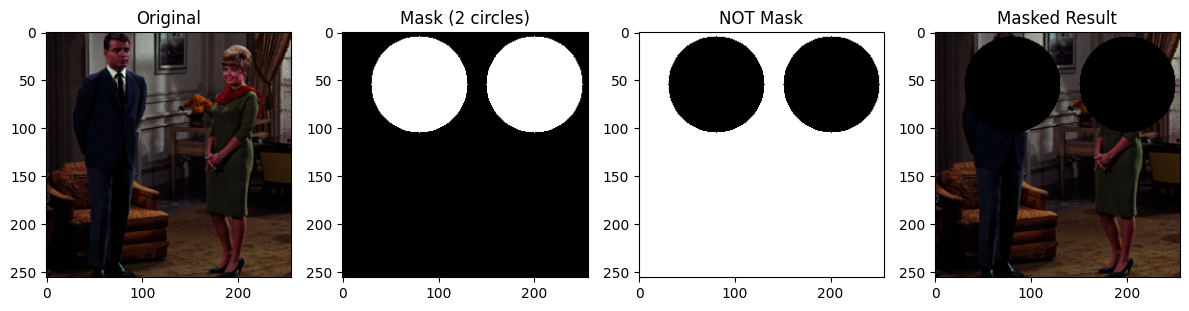

In [43]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Baca gambar
img = cv2.imread('/content/drive/MyDrive/images/couple.tiff')

# Mask kosong
mask1 = np.zeros(img.shape[:2], dtype="uint8")
mask2 = np.zeros(img.shape[:2], dtype="uint8")

# Lingkaran 1
cv2.circle(mask1, (80, 55), 50, 255, -1)

# Lingkaran 2
cv2.circle(mask2, (200, 55), 50, 255, -1)

# Gabungkan mask1 dan mask2 (pakai OR)
mask = cv2.bitwise_or(mask1, mask2)

# Lakukan NOT
mask_not = cv2.bitwise_not(mask)

# Masking dengan AND (gunakan mask_not sehingga area lingkaran menjadi hitam pada output)
masked = cv2.bitwise_and(img, img, mask=mask_not)

# Tampilkan hasil
plt.figure(figsize=(12,4))

plt.subplot(1,4,1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.axis('on')

plt.subplot(1,4,2)
plt.imshow(mask, cmap='gray')
plt.title("Mask (2 circles)")
plt.axis('on')

plt.subplot(1,4,3)
plt.imshow(mask_not, cmap='gray')
plt.title("NOT Mask")
plt.axis('on')

plt.subplot(1,4,4)
plt.imshow(cv2.cvtColor(masked, cv2.COLOR_BGR2RGB))
plt.title("Masked Result")
plt.axis('on')

plt.tight_layout()
plt.show()


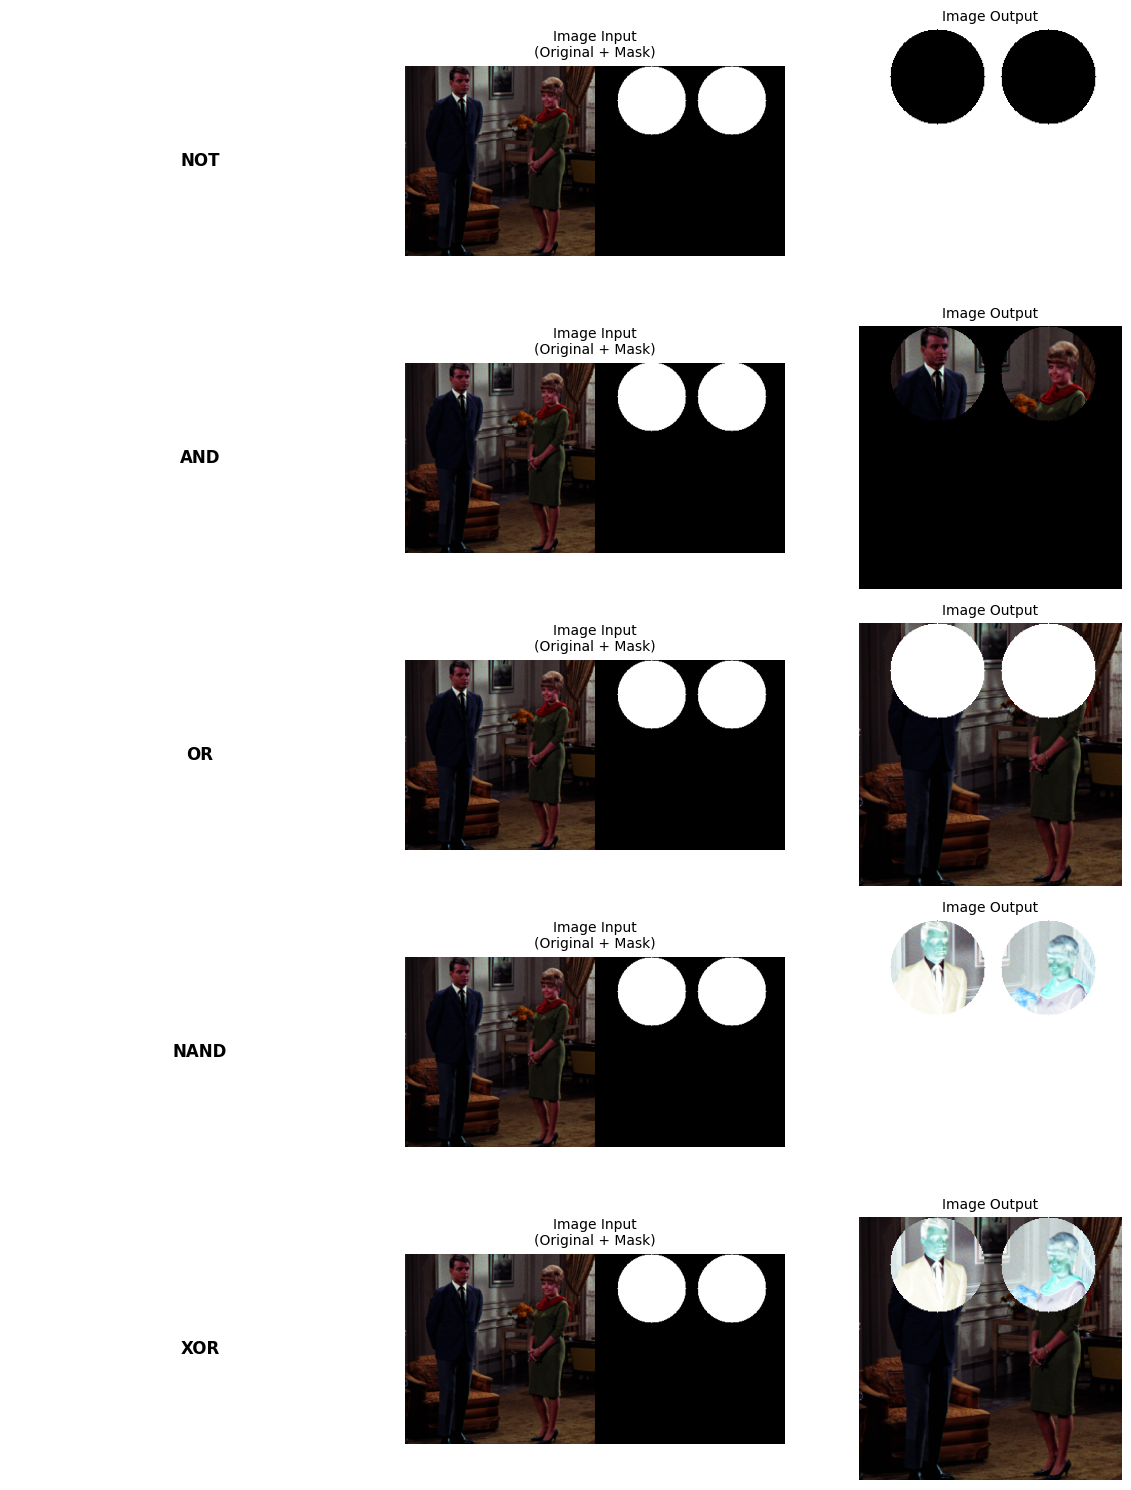

In [45]:
# ============ Pengaturan =================
image_path = '/content/drive/MyDrive/images/couple.tiff'  # ganti sesuai lokasi
save_path = 'mask_ops_results_aligned.png'  # file output (opsional)
# ==========================================

# Baca citra
img = cv.imread(image_path)
if img is None:
    raise FileNotFoundError(f"Image not found: {image_path}")

h, w = img.shape[:2]

# Buat mask
mask = np.zeros((h, w), dtype=np.uint8)
cv.circle(mask, center=(int(w*0.30), int(h*0.18)), radius=int(min(h,w)*0.18), color=255, thickness=-1)
cv.circle(mask, center=(int(w*0.72), int(h*0.18)), radius=int(min(h,w)*0.18), color=255, thickness=-1)
mask3 = cv.cvtColor(mask, cv.COLOR_GRAY2BGR)

# Operasi dasar
mask_not3   = cv.bitwise_not(mask3)
and_result  = cv.bitwise_and(img, img, mask=mask)
or_result   = cv.bitwise_or(img, mask3)
nand_result = cv.bitwise_not(and_result)
xor_result  = cv.bitwise_xor(img, mask3)

# Simpan hasil dalam list
operations = [
    ("NOT",   mask_not3),
    ("AND",   and_result),
    ("OR",    or_result),
    ("NAND",  nand_result),
    ("XOR",   xor_result)
]

# Tampilkan hasil dalam grid: kolom1=nama operator, kolom2=input, kolom3=output
nrows = len(operations)
plt.figure(figsize=(12, 3 * nrows))

for i, (op_name, output) in enumerate(operations):
    # kolom 1: judul operator
    ax = plt.subplot(nrows, 3, i*3+1)
    ax.axis("off")
    ax.text(0.5, 0.5, op_name, ha="center", va="center", fontsize=12, fontweight="bold")

    # kolom 2: input = original + mask (jejer)
    ax = plt.subplot(nrows, 3, i*3+2)
    combined_input = np.hstack((img, mask3))  # satukan kiri-kanan
    ax.imshow(cv.cvtColor(combined_input, cv.COLOR_BGR2RGB))
    ax.set_title("Image Input\n(Original + Mask)", fontsize=10)
    ax.axis("off")

    # kolom 3: output
    ax = plt.subplot(nrows, 3, i*3+3)
    ax.imshow(cv.cvtColor(output, cv.COLOR_BGR2RGB))
    ax.set_title("Image Output", fontsize=10)
    ax.axis("off")

plt.tight_layout()
plt.savefig(save_path, bbox_inches="tight", dpi=200)
plt.show()